# Titanic Survival Prediction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the dataset
passenger_data = pd.read_csv('Titanic.csv')

In [3]:
#Print the first 5 rows of the dataset
passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
passenger_data.shape

(891, 12)

There are 891 rows and 12 columns

##### Columns
1. PassengerID (Unique Identifier)
2. Survived (0 = Did Not Survive, 1 = Survived) (Target Variable)
3. Pclass (Ticket Class -> Socio-economic status) (1 = Upper Class, 2 = Middle Class, 3 = Lower Class)
4. Name (Name of the passenger)
5. Sex (Gender of the passenger)(male/female)
6. Age (Age of the passenger)
7. SibSp (No. of Siblings/Spouse aboard)
8. Parch (No. of Parents/Children aboard)
9. Ticket (Ticket number)
10. Fare (Price paid for the ticket)
11. Embarked (Port of embarkation) (C = Cherboug (France), Q = Queenstown (Ireland), Southampton (England))

In [5]:
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Check for missing values
passenger_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
passenger_data['Cabin'].replace(np.nan,'Unknown',inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_5832\2098044997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passenger_data['Cabin'].replace(np.nan,'Unknown',inplace=True)


In [8]:
avg_age = passenger_data['Age'].mean()
passenger_data['Age'].replace(np.nan,avg_age,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_5832\1902659338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passenger_data['Age'].replace(np.nan,avg_age,inplace=True)


In [9]:
passenger_data['Embarked'].replace(np.nan,'S',inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_5832\3352617837.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passenger_data['Embarked'].replace(np.nan,'S',inplace=True)


In [10]:
passenger_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
passenger_data['Deck'] = passenger_data['Cabin'].str[0]

In [12]:
passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,U


In [13]:
passenger_data.drop('Cabin',inplace=True,axis=1)

In [14]:
passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,U


In [15]:
class_rate = passenger_data.groupby('Pclass')['Survived'].value_counts(normalize=True).mul(100).reset_index()

In [16]:
class_rate

,Pclass,Survived,proportion
0,1,1,62.962963
1,1,0,37.037037
2,2,0,52.717391
3,2,1,47.282609
4,3,0,75.763747
5,3,1,24.236253


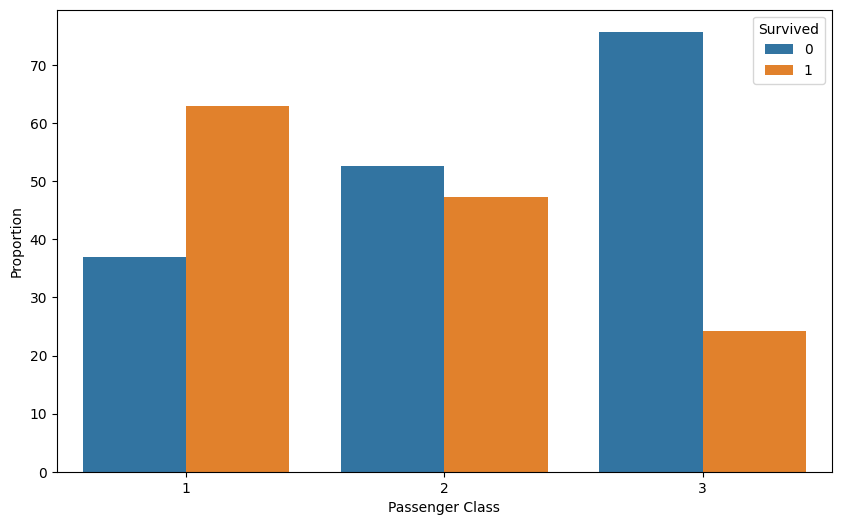

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass',y='proportion',hue='Survived',data=class_rate)
plt.ylabel('Proportion')
plt.xlabel('Passenger Class')
plt.show()

##### The chart shows that 
- 62.96% of passengers from upper class survived the wreck and the remaining 37.03% did not survive
- 47.28% of passengers from middle class survived the wreck and the remaining 52.71% did not survive
- 24.23% of passengers from lower class survived the wreck and the remaining 75.76% did not survive

In [18]:
sex_rate = passenger_data.groupby('Sex')['Survived'].value_counts(normalize=True).mul(100).reset_index()

In [19]:
sex_rate

,Sex,Survived,proportion
0,female,1,74.203822
1,female,0,25.796178
2,male,0,81.109185
3,male,1,18.890815


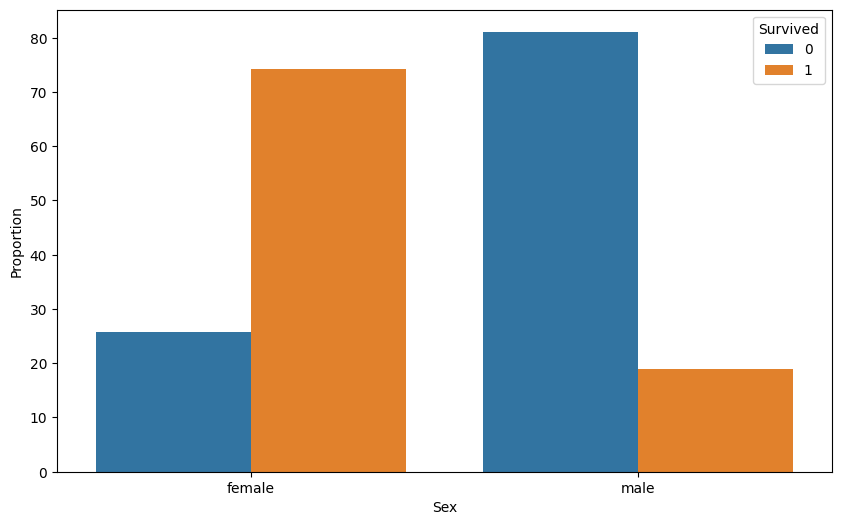

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sex',y='proportion',hue='Survived',data=sex_rate)
plt.ylabel('Proportion')
plt.xlabel('Sex')
plt.show()

##### The chart shows that 
- 74.20% of females survived the wreck and the remaining 25.79% did not survive
- 18.89% of males survived the wreck and the remaining 81.10% did not survive

In [21]:
embark_rate = passenger_data.groupby('Embarked')['Survived'].value_counts(normalize=True).mul(100).reset_index()

In [22]:
embark_rate

,Embarked,Survived,proportion
0,C,1,55.357143
1,C,0,44.642857
2,Q,0,61.038961
3,Q,1,38.961039
4,S,0,66.099071
5,S,1,33.900929


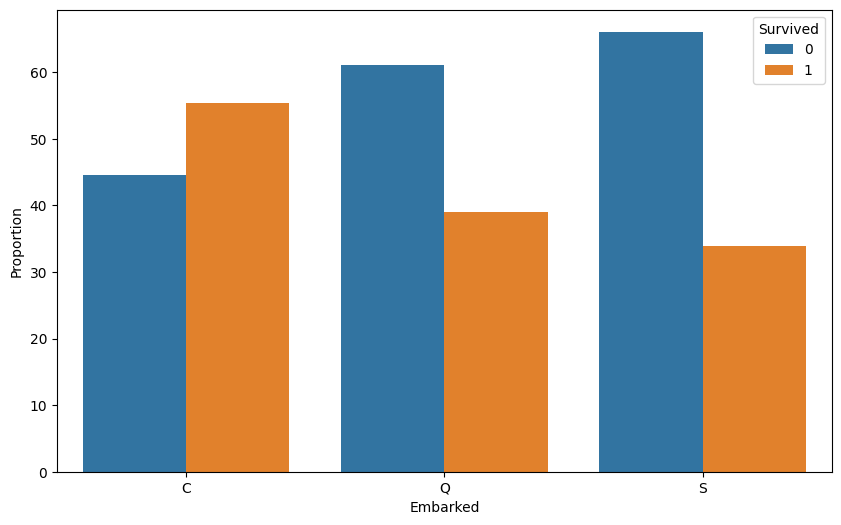

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Embarked',y='proportion',hue='Survived',data=embark_rate)
plt.ylabel('Proportion')
plt.xlabel('Embarked')
plt.show()

##### The chart shows that 
- 55.35% of passengers from Cherboug survived the wreck and the remaining 44.64% did not survive
- 38.96% of passengers from Queenstown survived the wreck and the remaining 61.03% did not survive
- 33.90% of passengers from Southampton survived the wreck and the remaining 66.09% did not survive

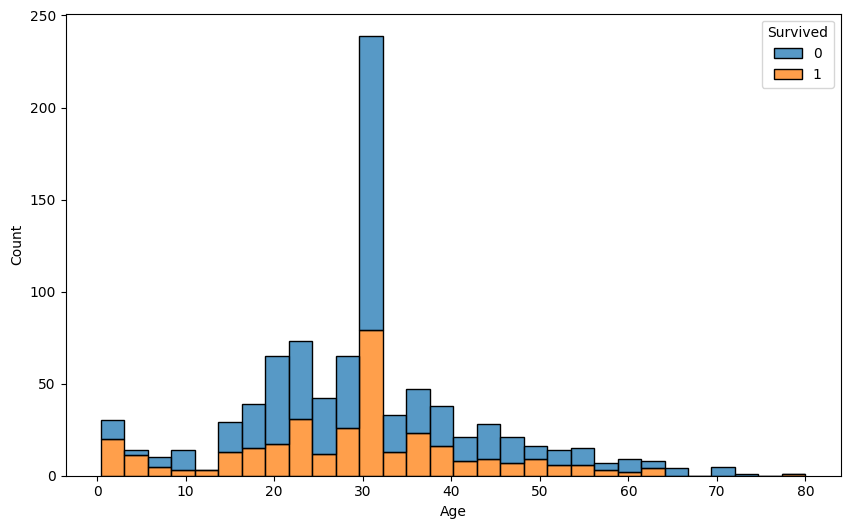

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(x='Age',hue='Survived',data=passenger_data,bins=30,multiple='stack')
plt.xlabel('Age')
plt.show()

##### The Chart tells us that
- Age group between 0 - 10 (children) have higher proportion of survival rate
- Age group between 15 - 40, the proportion of survival rate is very less 

In [25]:
passenger_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,U


In [27]:
passenger_data.drop('Name',inplace=True,axis=1)

In [28]:
passenger_data.drop('Ticket',inplace=True,axis=1)

In [29]:
passenger_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,male,22.0,1,0,7.2500,S,U
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,U
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,U


In [30]:
passenger_data.drop('PassengerId',inplace=True,axis=1)

In [31]:
passenger_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,U
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,U
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,U


In [32]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

scaler = StandardScaler()
encoder = LabelEncoder()

In [33]:
passenger_data['Age'] = scaler.fit_transform(passenger_data[['Age']])
passenger_data['SibSp'] = scaler.fit_transform(passenger_data[['SibSp']])
passenger_data['Parch'] = scaler.fit_transform(passenger_data[['Parch']])
passenger_data['Fare'] = scaler.fit_transform(passenger_data[['Fare']])

In [34]:
passenger_data['Sex'] = encoder.fit_transform(passenger_data[['Sex']])
passenger_data['Deck'] = encoder.fit_transform(passenger_data[['Deck']])

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
passenger_data['Embarked'] = encoder.fit_transform(passenger_data[['Embarked']])

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
passenger_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,-0.592481,0.432793,-0.473674,-0.502445,2,8
1,1,1,0,0.638789,0.432793,-0.473674,0.786845,0,2
2,1,3,0,-0.284663,-0.474545,-0.473674,-0.488854,2,8
3,1,1,0,0.407926,0.432793,-0.473674,0.420730,2,2
4,0,3,1,0.407926,-0.474545,-0.473674,-0.486337,2,8


### Model Building

In [37]:
X = passenger_data.drop('Survived',axis=1)
Y = passenger_data['Survived']

In [49]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [93]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [2, 4, 6, 10],
    'max_features': [None, 'sqrt', 'log2']
}


In [94]:
tree = DecisionTreeClassifier(random_state=42)

In [95]:
cv = StratifiedKFold(n_splits=5,shuffle=True)

In [96]:
model = GridSearchCV(estimator=tree,param_grid=param_grid,cv=cv,scoring='accuracy',verbose=3)

In [97]:
model.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10;, score=0.783 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10;, score=0.839 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10;, score=0.810 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10;, score=0.852 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=20;, score=0.783 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=20;, score=0.839 total time

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [2, 4, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [98]:
best_model = model.best_estimator_

In [99]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 30}

In [100]:
model.best_score_

np.float64(0.8272628779671033)

In [102]:
model.score(X_test,Y_test)

0.7262569832402235

In [104]:
model.score(X_train,Y_train)

0.8230337078651685

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
param_grid = {
    'n_estimators': [100, 200, 300],    
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 9, None],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

In [107]:
rf = RandomForestClassifier(random_state=42)

In [108]:
model = GridSearchCV(estimator=rf,param_grid=param_grid,cv=cv,scoring='accuracy',verbose=3)

In [109]:
model.fit(X_train,Y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.804 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.825 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.824 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.810 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.810 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.804 total time=   0.2s
[CV 2/5] END crite

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 7, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [2, 4, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [111]:
model.best_score_

np.float64(0.8399192356938837)

In [112]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [113]:
best_model = model.best_estimator_

In [114]:
model.score(X_test,Y_test)

0.7988826815642458

In [115]:
model.score(X_train,Y_train)

0.8890449438202247

In [116]:
param_grid = {
    'n_estimators': [100, 200, 300],   # number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1], # step size shrinkage
    'max_depth': [3, 4, 5],            # depth of each tree
    'min_samples_split': [2, 5, 10],   # minimum samples to split
    'min_samples_leaf': [1, 2, 4],     # minimum samples at a leaf
    'max_features': [None, 'sqrt', 'log2'] # features considered per split
}

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [235]:
gb = GradientBoostingClassifier(learning_rate = 0.001,max_depth=3,max_features=None,min_samples_leaf=3,min_samples_split=5,n_estimators=1000,random_state=42)

In [236]:
gb.fit(X_train,Y_train)

,loss,'log_loss'
,learning_rate,0.001
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [237]:
gb.score(X_test,Y_test)

0.7932960893854749

In [238]:
gb.score(X_train,Y_train)

0.8370786516853933

In [241]:
yhat = gb.predict(X_test)

In [242]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [243]:
accuracy_score(Y_test,yhat)

0.7932960893854749

In [244]:
precision_score(Y_test,yhat)

0.8636363636363636

In [245]:
recall_score(Y_test,yhat)

0.5507246376811594

In [246]:
f1_score(Y_test,yhat)

0.672566371681416

In [247]:
conf_matrix = confusion_matrix(Y_test,yhat)

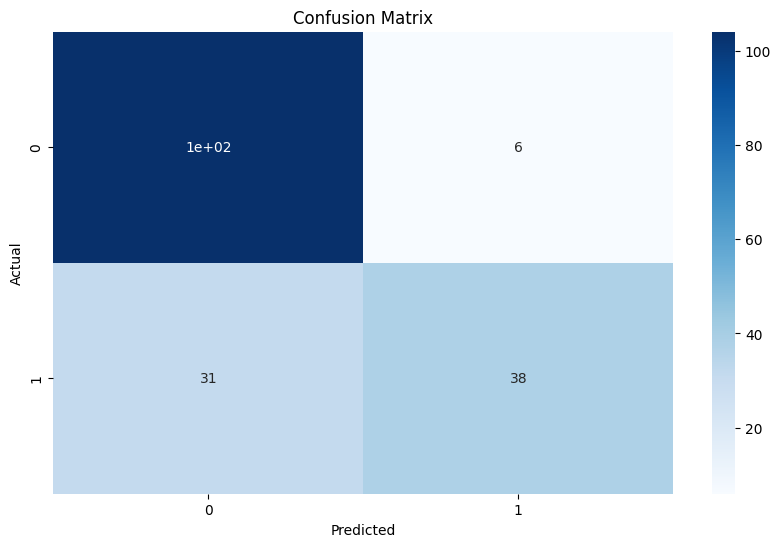

In [248]:
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,cmap='Blues',annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [256]:
predicted_df = X_test.copy()

In [257]:
predicted_df['Survived'] = yhat

In [258]:
predicted_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Survived
565,3,1,-0.438572,1.340132,-0.473674,-0.162169,2,8,0
160,3,1,1.100515,-0.474545,0.767630,-0.324253,2,8,0
553,3,1,-0.592481,-0.474545,-0.473674,-0.502949,0,8,0
860,3,1,0.869652,1.340132,-0.473674,-0.364355,2,8,0
241,3,0,0.000000,0.432793,-0.473674,-0.336334,1,8,1


In [259]:
predicted_df.to_csv('predicted.csv')